In [2]:
from image import Image, Marker, MarkerRectangle2D, MarkerFill2D, MarkerContainer
from filters.filters import BaseFilter2D
import filters.filters_2dim as filters_2d
from segmentation import Segmentation

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
number_of_image = 2       # 1 2 3

In [4]:
path_to_image = f'data/{number_of_image}.png'
path_to_markers_file = f'data/markers_{number_of_image}.json'
dim = 2


def scale(figsize=(10, 10)):
    plt.figure(figsize=figsize)

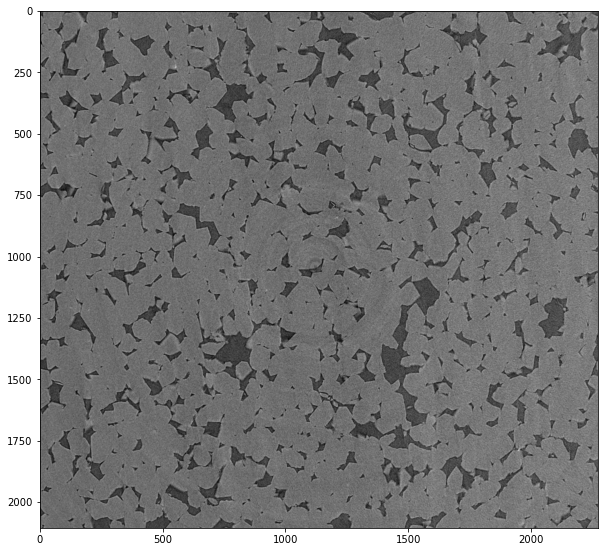

In [5]:
image = Image(path_to_image=path_to_image, dim = dim) # open image 
scale()
image.show()

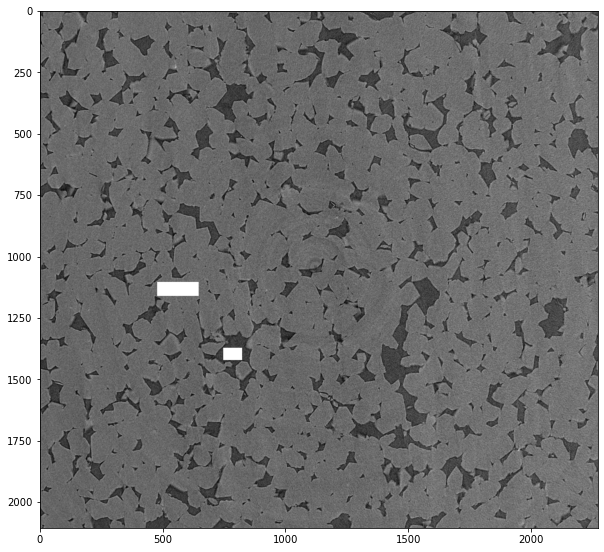

In [6]:
# set markers with classes from file
markers = MarkerContainer()
markers.from_file(path_to_markers_file)
scale()
image.draw_marker(markers)
image.show()
image.reset()

In [7]:
sgm = Segmentation(RandomForestClassifier())                                    # set model for segmentation 

sgm.segmentate(image, markers, [filters_2d.MedianFilter(size = 5), 
                                filters_2d.GaussianFilter(sigma = 5), 
                                filters_2d.LaplacianDifference(),
                                filters_2d.BaseFilter2D()], informing=True)    # segmentation with filters & markers
print('Finish')

Appplying filters...
Making test data...
Fitting model...
Making predictions...
Transforming result...
Finish


marker class = 1


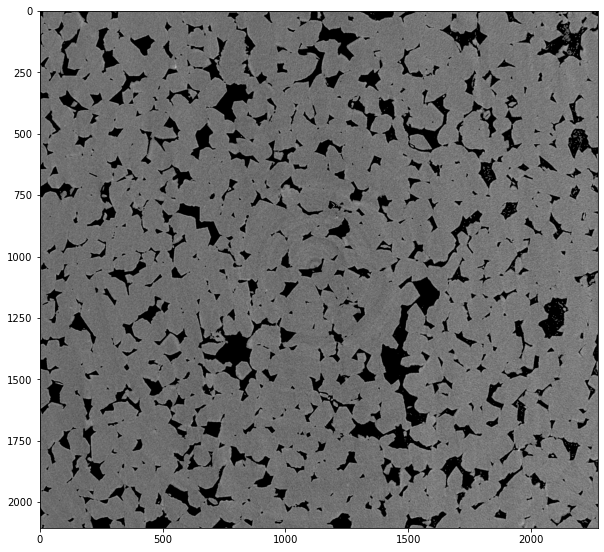

marker class = 0


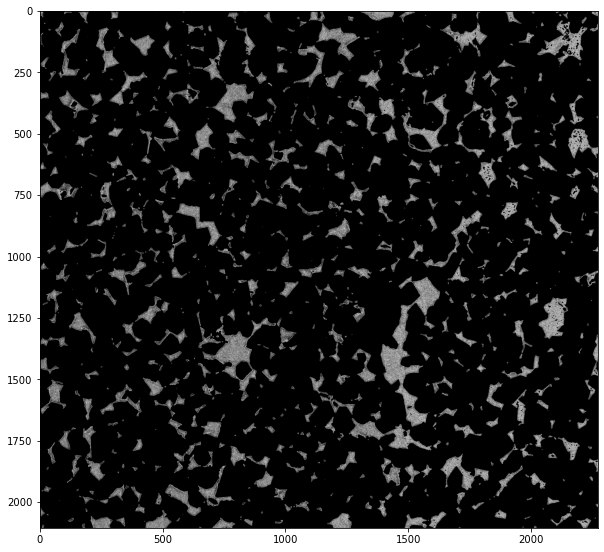

{'Median Filter': 0.4406669654125194, 'Gaussian Filter': 0.41055581677341013, 'Laplacian Difference': 2.5088384151683165e-05, 'Base Filter': 0.14875212942991878}


In [8]:
scale()
image.show_segments(markers[0], fill_color=0)                                          # show 1 class

scale()
image.show_segments(markers[1])                                                        # show 0 class

print(sgm.feature_weights())